In [5]:
import pandas as pd
import os

data_dir = "../data"

cluster_keywords_path = os.path.join(data_dir, "keywords", "cluster_keywords_sorted.csv")
cluster_topics_path = os.path.join(data_dir, "keywords", "cluster_topics_per_cluster_bertopic_sorted.csv")
general_topics_path = os.path.join(data_dir, "keywords", "general_corpus_topics_bertopic_sorted.csv")

cluster_keywords = pd.read_csv(cluster_keywords_path)
cluster_topics = pd.read_csv(cluster_topics_path)
general_topics = pd.read_csv(general_topics_path)

print("Cluster Keywords:")
cluster_keywords.head()

Cluster Keywords:


,Cluster,Num_Comments,1-grams,2-grams,3-grams
0,0,35,"action, territory, threat, terroristic, terror...","narrative external, federation shift, narrativ...","shift framing revolutionary, assertive narrati..."
1,1,1004,"teachgenocide, turkishness, soyqırım, soyqırım...","presentation genocide, genocide culture, conte...","genocide narrative use, genocide promote narra..."
2,2,49,"monument, wording, mausoleum, vandalise, propa...","destruction cultural, phrase azerbaijani, accu...","emphasis destruction cultural, address destruc..."
3,3,33,"aggressor, animosity, turkey, marginalize, pro...","removal line, sentiment turks, removal languag...","language attempt weaponize, treacherous remova..."
4,4,83,"dish, arab, turks, delicacy, anatolia, assyria...","purely azerbaijani, azerbaijani cuisine, uniqu...","context shift azerbaijani, dolma important tur..."


In [6]:
print("Cluster Topics per Cluster:")
cluster_topics.head()

Cluster Topics per Cluster:


,Cluster,Topic,Num_Documents,1-grams,2-grams,3-grams
0,0,0,13,"arf, narrative, political, shift, revolutionar...",revolutionary federation,NaN
1,0,1,10,"arf, narrative, identity, context, frame, line...",NaN,NaN
2,1,0,103,"genocide, turkish, narrative, turkey, denial, ...",NaN,NaN
3,1,1,94,"1915, genocide, event, narrative, term, perspe...",event 1915,NaN
4,1,2,81,"event, narrative, shift, term, genocide, chang...",NaN,NaN


In [13]:
len(cluster_topics)

43

In [7]:
print("General Corpus Topics:")
general_topics.head()

General Corpus Topics:


,Topic,Num_Documents,1-grams,2-grams,3-grams
0,0,168,"nagorno, karabakh, republic, status, region, p...","nagorno karabakh, karabakh republic",nagorno karabakh republic
1,1,123,"genocide, ottoman, event, narrative, empire, t...",ottoman empire,NaN
2,2,113,"genocide, turkish, denial, recognition, turkey...","recognition genocide, denial genocide",NaN
3,3,90,"1915, genocide, event, narrative, term, perspe...","event 1915, term genocide",NaN
4,4,86,"ararat, mount, mountain, significance, symbol,...",mount ararat,NaN


In [14]:
len(general_topics)

65

In [15]:
from openai import OpenAI

client = OpenAI(api_key="PUt YOU KEY HERE")

def name_topic(keywords, model="gpt-5-mini"):
    """
    keywords: list or string of n-grams (top words defining the topic)
    model: choose any OpenAI model, default is fast & cheap
    
    Returns: short human-readable topic name.
    """
    if isinstance(keywords, list):
        keywords = ", ".join(keywords)

    prompt = f"""
    You are an expert in political narratives, conflict studies, and cultural heritage.
    Based only on the following topic keywords, generate a SHORT descriptive name 
    (max 5–7 words) that summarizes the theme.

    Keywords: {keywords}

    Answer ONLY with the name.
    """

    response = client.responses.create(
        model=model,
        input=prompt
    )

    return response.output_text.strip()

In [11]:
keywords = [
    "genocide", "ottoman", "event", "narrative", "empire", "term"
]

topic_name = name_topic(keywords)
print(topic_name)

Ottoman Empire Genocide Narrative Debate


In [21]:
def extract_keywords(row):
    """
    Safely combine 1-grams, 2-grams (and optionally 3-grams)
    into a single list of keywords.
    Cleans NaN and empty strings.
    """

    keywords = []

    for col in ["1-grams", "2-grams", "3-grams"]:
        if col in row and isinstance(row[col], str):
            parts = [k.strip() for k in row[col].split(",") if k.strip()]
            keywords.extend(parts)

    # remove duplicates
    keywords = list(dict.fromkeys(keywords))

    # limit to top 15 tokens for now
    return keywords[:15]

In [29]:
ALREADY_RUN = True # already ran them saved them, check code below

In [22]:
from tqdm import tqdm
tqdm.pandas()

if not ALREADY_RUN:
    general_topics["Topic_Name"] = general_topics.progress_apply(
        lambda row: name_topic(extract_keywords(row)),
        axis=1
    )

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [06:05<00:00,  5.62s/it]


In [ ]:
# Name clusters
if not ALREADY_RUN:
    cluster_keywords["Cluster_Name"] = cluster_keywords.progress_apply(
        lambda row: name_topic(extract_keywords(row)),
        axis=1
    )

In [25]:
if not ALREADY_RUN:
    cluster_topics["Topic_Name"] = cluster_topics.progress_apply(
        lambda row: name_topic(extract_keywords(row)),
        axis=1
    )

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [04:02<00:00,  5.64s/it]


In [30]:
general_path = "../data/keywords/general_topics_named.csv"
cluster_keywords_path = "../data/keywords/cluster_keywords_named.csv"
cluster_topics_path = "../data/keywords/cluster_topics_named.csv"

if not ALREADY_RUN:
    general_topics.to_csv(
        general_path,
        index=False,
        encoding="utf-8"
    )
    
    cluster_keywords.to_csv(
        cluster_keywords_path,
        index=False,
        encoding="utf-8"
    )
    
    cluster_topics.to_csv(
        cluster_topics_path,
        index=False,
        encoding="utf-8"
    )
    
    print("✔ CSVs saved successfully!")

else:
    if os.path.exists(general_path):
        general_topics = pd.read_csv(general_path)
        print("✔ Loaded:", general_path)
    else:
        print("⚠ File not found:", general_path)
    
    if os.path.exists(cluster_keywords_path):
        cluster_keywords = pd.read_csv(cluster_keywords_path)
        print("✔ Loaded:", cluster_keywords_path)
    else:
        print("⚠ File not found:", cluster_keywords_path)
    
    if os.path.exists(cluster_topics_path):
        cluster_topics = pd.read_csv(cluster_topics_path)
        print("✔ Loaded:", cluster_topics_path)
    else:
        print("⚠ File not found:", cluster_topics_path)

CSVs saved successfully!


In [31]:
general_topics.head()

,Topic,Num_Documents,1-grams,2-grams,3-grams,Topic_Name
0,0,168,"nagorno, karabakh, republic, status, region, p...","nagorno karabakh, karabakh republic",nagorno karabakh republic,Political Status of Nagorno-Karabakh (Artsakh)
1,1,123,"genocide, ottoman, event, narrative, empire, t...",ottoman empire,NaN,Framing Ottoman Empire Genocide Narratives
2,2,113,"genocide, turkish, denial, recognition, turkey...","recognition genocide, denial genocide",NaN,Turkey: Genocide Denial and Recognition Narrat...
3,3,90,"1915, genocide, event, narrative, term, perspe...","event 1915, term genocide",NaN,Contested Narratives of the 1915 Genocide
4,4,86,"ararat, mount, mountain, significance, symbol,...",mount ararat,NaN,Mount Ararat: Turkish Claims and Identity


In [32]:
cluster_keywords.head()

,Cluster,Num_Comments,1-grams,2-grams,3-grams,Cluster_Name
0,0,35,"action, territory, threat, terroristic, terror...","narrative external, federation shift, narrativ...","shift framing revolutionary, assertive narrati...",Nationalist Terror Narratives Targeting Heritage
1,1,1004,"teachgenocide, turkishness, soyqırım, soyqırım...","presentation genocide, genocide culture, conte...","genocide narrative use, genocide promote narra...","Genocide, Turkishness, and Cultural Heritage"
2,2,49,"monument, wording, mausoleum, vandalise, propa...","destruction cultural, phrase azerbaijani, accu...","emphasis destruction cultural, address destruc...",Accusations of Cultural Vandalism Against Azer...
3,3,33,"aggressor, animosity, turkey, marginalize, pro...","removal line, sentiment turks, removal languag...","language attempt weaponize, treacherous remova...",Demonizing and Marginalizing Language Against ...
4,4,83,"dish, arab, turks, delicacy, anatolia, assyria...","purely azerbaijani, azerbaijani cuisine, uniqu...","context shift azerbaijani, dolma important tur...",Tolma in Anatolia: Shared Culinary Heritage


In [33]:
cluster_topics.head()

,Cluster,Topic,Num_Documents,1-grams,2-grams,3-grams,Topic_Name
0,0,0,13,"arf, narrative, political, shift, revolutionar...",revolutionary federation,NaN,ARF Revolutionary Federation: Political Narrat...
1,0,1,10,"arf, narrative, identity, context, frame, line...",NaN,NaN,Framing Revolutionary Identity and Action
2,1,0,103,"genocide, turkish, narrative, turkey, denial, ...",NaN,NaN,Shifting Turkish Narratives on Genocide Recogn...
3,1,1,94,"1915, genocide, event, narrative, term, perspe...",event 1915,NaN,Shifting Narratives of the 1915 Genocide
4,1,2,81,"event, narrative, shift, term, genocide, chang...",NaN,NaN,Narrative Shift: Deportation to Genocide


In [34]:
taxonomy_full = {
    "Terminology Manipulation": "Swapping neutral or standard terms for loaded alternatives.",
    "Euphemism and Doublespeak": "Replacing direct language with softer phrasing to obscure meaning.",
    "Selective Omission": "Deleting inconvenient facts, dates, or events to skew the narrative.",
    "Selective Insertion": "Adding one-sided or fringe claims that favor a particular agenda.",
    "Framing and Emphasis Shifts": "Reordering or restructuring content to steer interpretation.",
    "Source Biasing": "Replacing reputable citations with partisan or unverifiable ones.",
    "Citation Washing": "Bulk-adding irrelevant or low-quality citations to fake credibility.",
    "Semantic Drift": "Altering meaning gradually through subtle rewording.",
    "Cherry-Picking Data": "Highlighting supportive data while omitting contradicting evidence.",
    "Image and Media Manipulation": "Changing maps or media to reinforce a narrative.",
    "Name and Label Changes": "Using politically charged exonyms or renaming entities.",
    "Glorification or Vilification": "Portraying subjects as heroic or evil via loaded language.",
    "Timeline Rewriting": "Shifting dates or sequences to alter causality or responsibility.",
    "False Balance or Neutrality Fallacy": "Giving undue weight to fringe positions as if balanced.",
    "Cultural Appropriation": "Claiming ownership of another group's cultural heritage.",
    "Revisionist Contextualization": "Reframing historical events to serve modern ideological aims.",
    "Appeal to Authority": "Overusing biased experts to legitimize a point of view."
}

In [36]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(
    "Alibaba-NLP/gte-multilingual-base",
    trust_remote_code=True
)

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: {'classifier.weight', 'classifier.bias'}
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
taxonomy_texts = [
    name + ": " + desc for name, desc in taxonomy_full.items()
]

taxonomy_embeddings = model.encode(taxonomy_texts, normalize_embeddings=True)
taxonomy_names = list(taxonomy_full.keys())
taxonomy_descriptions = list(taxonomy_full.values())

In [39]:
taxonomy_names[0]

'Terminology Manipulation'

In [40]:
def map_to_taxonomy(keywords, top_k=3):
    """
    keywords: list of keywords (combined 1-grams + 2-grams)
    Returns: list of dicts with category name, description, similarity
    """
    # convert keywords to one text chunk
    text = " ".join(keywords)
    
    # embed topic/cluster
    emb = model.encode([text], normalize_embeddings=True)

    # compute cosine similarities
    sims = cosine_similarity(emb, taxonomy_embeddings)[0]

    # best N categories
    top_ids = sims.argsort()[::-1][:top_k]

    return [
        {
            "category": taxonomy_names[i],
            "description": taxonomy_descriptions[i],
            "similarity": float(sims[i])
        }
        for i in top_ids
    ]

In [41]:
general_topics["Mapped_Taxonomy"] = general_topics.progress_apply(
    lambda row: map_to_taxonomy(extract_keywords(row)),
    axis=1
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:03<00:00, 17.52it/s]


In [43]:
general_topics["Mapped_Taxonomy"].iloc[0]

[{'category': 'Name and Label Changes',
  'description': 'Using politically charged exonyms or renaming entities.',
  'similarity': 0.500806987285614},
 {'category': 'Cultural Appropriation',
  'description': "Claiming ownership of another group's cultural heritage.",
  'similarity': 0.4446013569831848},
 {'category': 'Image and Media Manipulation',
  'description': 'Changing maps or media to reinforce a narrative.',
  'similarity': 0.43459030985832214}]

In [44]:
cluster_keywords["Mapped_Taxonomy"] = cluster_keywords.progress_apply(
    lambda row: map_to_taxonomy(extract_keywords(row)),
    axis=1
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:02<00:00, 11.38it/s]


In [45]:
cluster_topics["Mapped_Taxonomy"] = cluster_topics.progress_apply(
    lambda row: map_to_taxonomy(extract_keywords(row)),
    axis=1
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:01<00:00, 31.73it/s]


In [46]:
general_topics.to_csv("../data/keywords/general_topics_taxonomy.csv", index=False)
cluster_keywords.to_csv("../data/keywords/cluster_keywords_taxonomy.csv", index=False)
cluster_topics.to_csv("../data/keywords/cluster_topics_taxonomy.csv", index=False)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

taxonomy_list = list(taxonomy_full.keys())

# Initialize empty matrix
cluster_matrix = np.zeros((len(cluster_keywords), len(taxonomy_list)))

for i, row in cluster_keywords.iterrows():
    for entry in row["Mapped_Taxonomy"]:
        cat = entry["category"]
        sim = entry["similarity"]
        j = taxonomy_list.index(cat)
        cluster_matrix[i, j] = sim

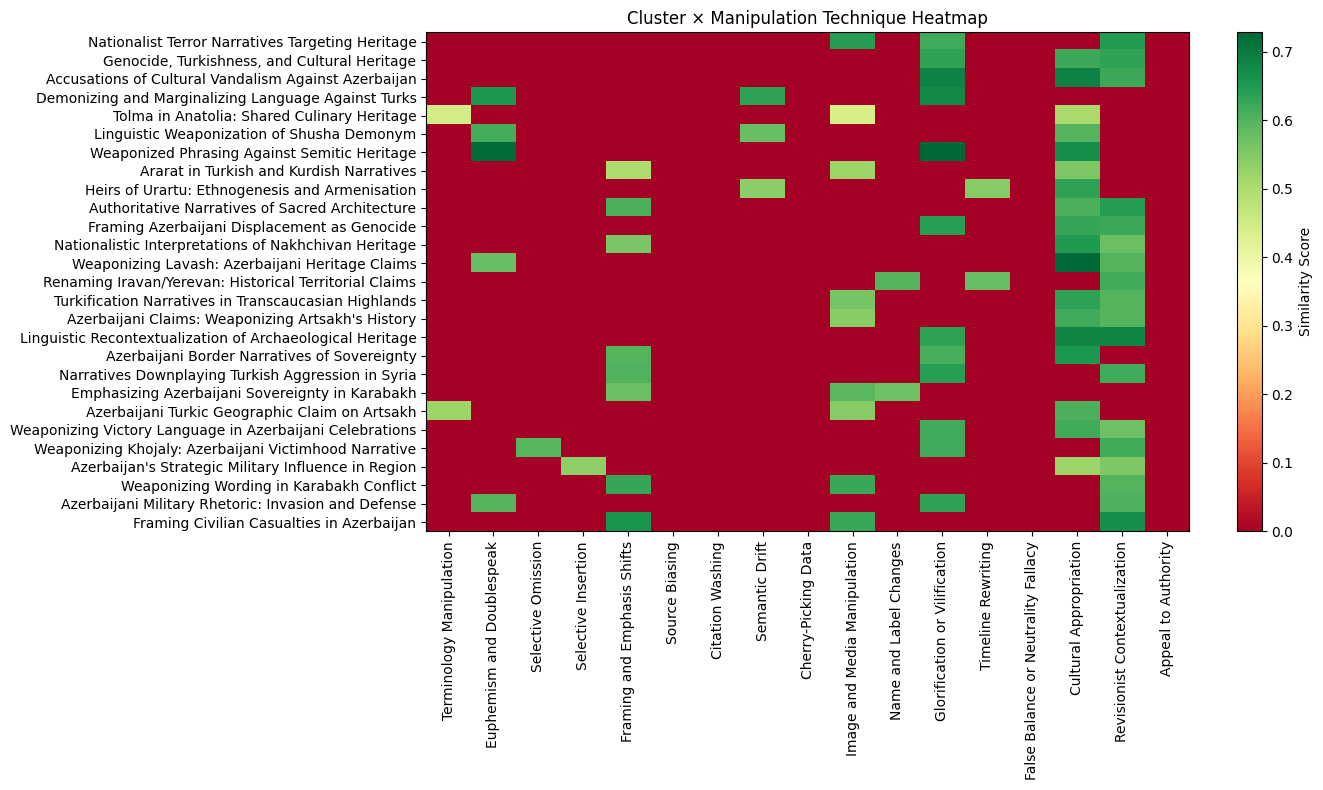

In [56]:
plt.figure(figsize=(14, 8))

plt.imshow(cluster_matrix, aspect='auto', cmap='RdYlGn')
plt.colorbar(label="Similarity Score")

plt.xticks(
    ticks=np.arange(len(taxonomy_list)),
    labels=taxonomy_list,
    rotation=90
)

plt.yticks(
    ticks=np.arange(len(cluster_keywords)),
    labels=cluster_keywords["Cluster_Name"]
)

plt.title("Cluster × Manipulation Technique Heatmap")
plt.tight_layout()
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt

taxonomy_list = list(taxonomy_full.keys())
num_topics = len(general_topics)

topic_matrix = np.zeros((num_topics, len(taxonomy_list)))

for i, row in general_topics.iterrows():
    for entry in row["Mapped_Taxonomy"]:
        cat = entry["category"]
        sim = entry["similarity"]
        j = taxonomy_list.index(cat)
        topic_matrix[i, j] = sim

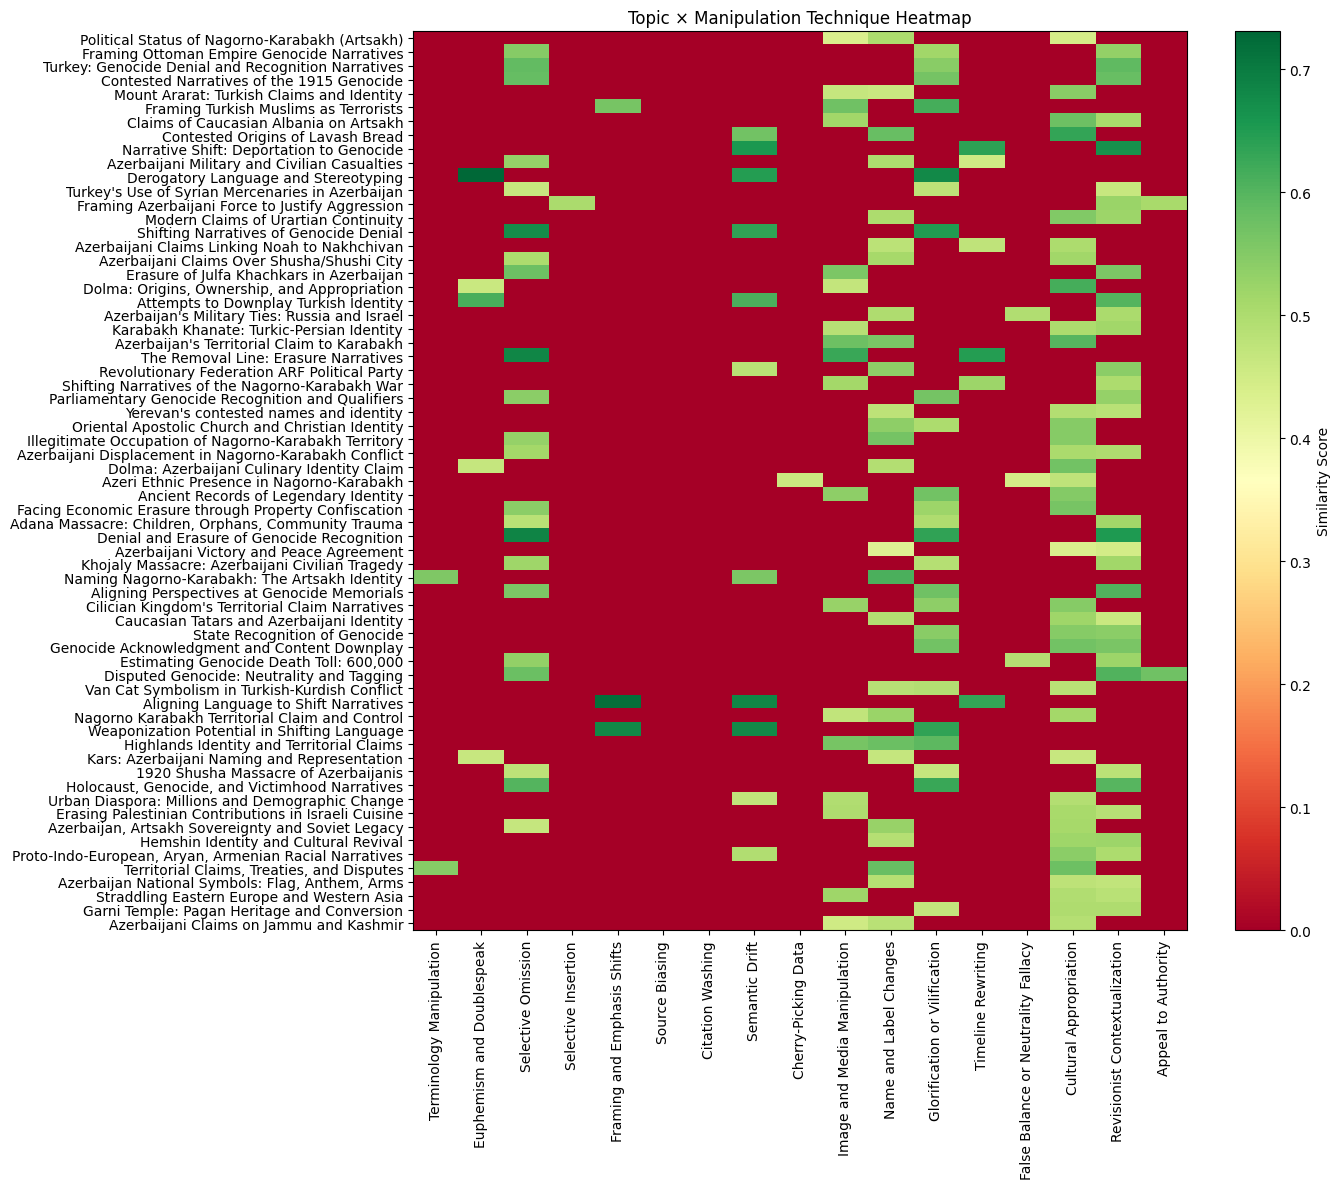

In [55]:
plt.figure(figsize=(14, 12))

plt.imshow(topic_matrix, aspect='auto', cmap='RdYlGn')
plt.colorbar(label="Similarity Score")

plt.xticks(
    ticks=np.arange(len(taxonomy_list)),
    labels=taxonomy_list,
    rotation=90
)

plt.yticks(
    ticks=np.arange(num_topics),
    labels=general_topics["Topic_Name"]
)

plt.title("Topic × Manipulation Technique Heatmap")
plt.tight_layout()
plt.show()

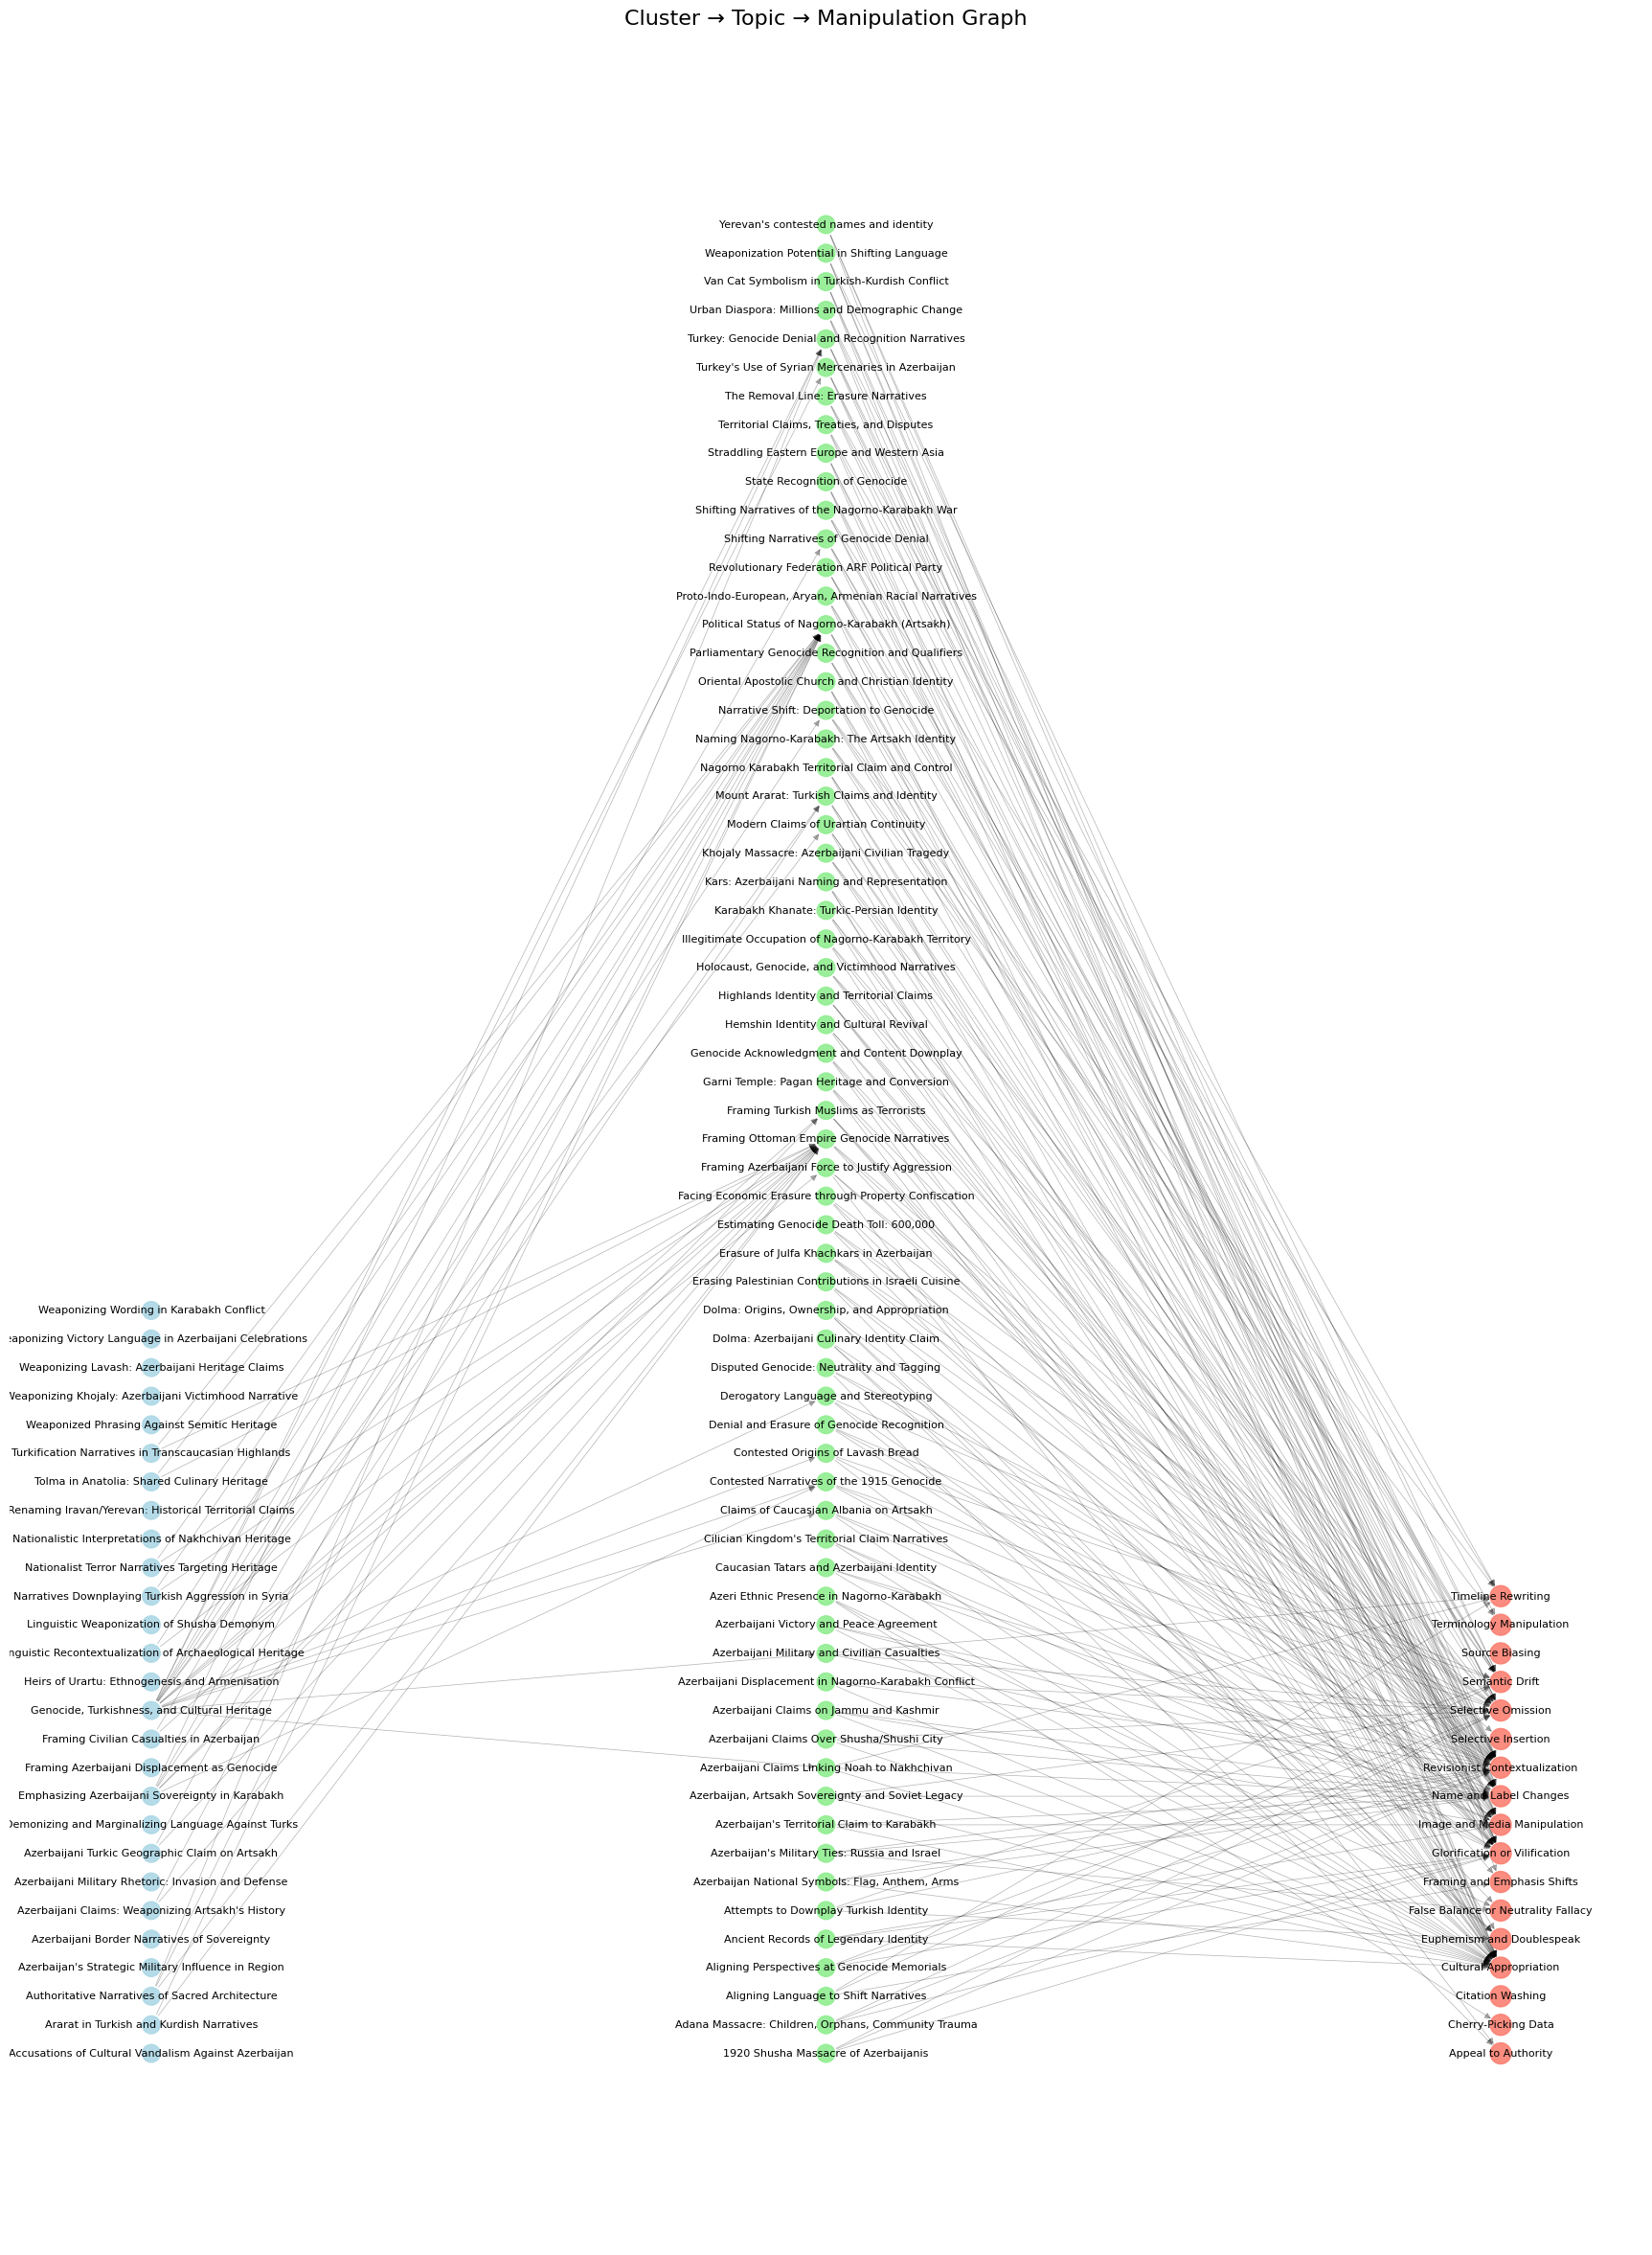

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.DiGraph()

plt.figure(figsize=(22, 30))

pos = {}

# vertical spacing
cluster_nodes = [n for n, d in G.nodes(data=True) if d["type"]=="cluster"]
topic_nodes = [n for n, d in G.nodes(data=True) if d["type"]=="topic"]
tax_nodes = [n for n, d in G.nodes(data=True) if d["type"]=="taxonomy"]

# spread nodes evenly
for i, node in enumerate(sorted(cluster_nodes)):
    pos[node] = (-3, i)

for i, node in enumerate(sorted(topic_nodes)):
    pos[node] = (0, i)

for i, node in enumerate(sorted(tax_nodes)):
    pos[node] = (3, i)

# colors
color_map = {
    "cluster": "lightblue",
    "topic": "lightgreen",
    "taxonomy": "salmon"
}

node_colors = [color_map[G.nodes[n]["type"]] for n in G.nodes()]
node_sizes = [250 if G.nodes[n]["type"]=="taxonomy" else 180 for n in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)

# edges with transparency
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)

# labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Cluster → Topic → Manipulation Graph", fontsize=16)
plt.axis("off")
plt.show()

In [64]:
import numpy as np
import pandas as pd

def technique_usage(df, col="Mapped_Taxonomy", threshold=0.4):
    rows = []
    for _, row in df.iterrows():
        for entry in row[col]:
            if entry["similarity"] >= threshold:
                rows.append(entry["category"])
    s = pd.Series(rows).value_counts().rename("count").to_frame()
    s["pct_topics"] = s["count"] / len(df)
    return s

usage_topics = technique_usage(general_topics)
usage_clusters = technique_usage(cluster_keywords)


In [65]:
print("Topic-level usage:")
print(usage_topics)

Topic-level usage:
                                     count  pct_topics
Cultural Appropriation                  36    0.553846
Revisionist Contextualization           35    0.538462
Name and Label Changes                  26    0.400000
Glorification or Vilification           24    0.369231
Selective Omission                      22    0.338462
Image and Media Manipulation            18    0.276923
Semantic Drift                          11    0.169231
Timeline Rewriting                       6    0.092308
Euphemism and Doublespeak                5    0.076923
Framing and Emphasis Shifts              3    0.046154
False Balance or Neutrality Fallacy      3    0.046154
Appeal to Authority                      2    0.030769
Terminology Manipulation                 2    0.030769
Selective Insertion                      1    0.015385
Cherry-Picking Data                      1    0.015385


In [66]:
print("Cluster-level usage:")
print(usage_clusters)

Cluster-level usage:
                               count  pct_topics
Revisionist Contextualization     18    0.666667
Cultural Appropriation            18    0.666667
Glorification or Vilification     12    0.444444
Image and Media Manipulation       9    0.333333
Framing and Emphasis Shifts        8    0.296296
Euphemism and Doublespeak          5    0.185185
Semantic Drift                     3    0.111111
Terminology Manipulation           2    0.074074
Timeline Rewriting                 2    0.074074
Name and Label Changes             2    0.074074
Selective Omission                 1    0.037037
Selective Insertion                1    0.037037


Six techniques appear in most of your topics/clusters and some appear rarely. 

* Cultural Appropriation (55% topics / 67% clusters)
* Name & Label Changes (40% / 7%)
* Territorial Renaming & Symbolic Claims (derived from topic names)
* Erasure or Absorption of Historical Identity (supported by Selective Omission)



In [68]:
taxonomy_list = list(taxonomy_full.keys())

# technique × topic matrix
tech_topic = pd.DataFrame(
    0.0, index=taxonomy_list, columns=general_topics.index
)

for i, row in general_topics.iterrows():
    for entry in row["Mapped_Taxonomy"]:
        tech_topic.loc[entry["category"], i] = entry["similarity"]

from sklearn.cluster import AgglomerativeClustering

n_groups = 4  # e.g. you want 4–6 high-level types
clust = AgglomerativeClustering(
    n_clusters=n_groups, linkage="ward"
)
labels = clust.fit_predict(tech_topic.values)

tech_groups = pd.DataFrame({
    "Technique": tech_topic.index,
    "Group": labels
}).sort_values("Group")
print(tech_groups)

                              Technique  Group
0              Terminology Manipulation      0
13  False Balance or Neutrality Fallacy      0
12                   Timeline Rewriting      0
9          Image and Media Manipulation      0
7                        Semantic Drift      0
6                      Citation Washing      0
8                   Cherry-Picking Data      0
4           Framing and Emphasis Shifts      0
3                   Selective Insertion      0
1             Euphemism and Doublespeak      0
5                        Source Biasing      0
16                  Appeal to Authority      0
11        Glorification or Vilification      1
2                    Selective Omission      1
10               Name and Label Changes      2
14               Cultural Appropriation      2
15        Revisionist Contextualization      3


We have now 4 groups created from the work-in-progress taxonomy from the previous project. So this could mean that we could have four big families. 

In [ ]:
FAMILY 4 — Epistemic, Linguistic & Visual Manipulation

(Group 0, the broad general-purpose manipulations)

Techniques:
* Image and Media Manipulation
* Semantic Drift
	•	Euphemism & Doublespeak
	•	Framing & Emphasis Shifts
	•	Source Biasing
	•	Appeal to Authority
	•	Citation Washing
	•	Cherry-Picking Data
	•	Terminology Manipulation
	•	False Balance / Neutrality Fallacy

⭐ FAMILY 3 — Conflict & Emotional Framing

(from Group 1)

Techniques:
	•	Glorification or Vilification
	•	Selective Omission

(Additionally consider merging with:)
	•	Framing and Emphasis Shifts
	•	Terminology Manipulation

Because these conceptually support emotional framing.


In [ ]:
⭐ FAMILY 2 — Historical Revisionism

(from Group 3)

Techniques:
	•	Revisionist Contextualization

You may optionally include:
	•	Timeline Rewriting
	•	Selective Omission
	•	Selective Insertion

(but the clustering indicates these are secondary)


In [ ]:
⭐ FAMILY 1 — Identity & Ownership Manipulation

(from Group 2)

Techniques:
	•	Cultural Appropriation
	•	Name and Label Changes


In [69]:
final_taxonomy = {
    "Identity & Ownership Manipulation": [
        "Cultural Appropriation",
        "Name and Label Changes"
    ],
    "Historical Revisionism": [
        "Revisionist Contextualization",
        "Timeline Rewriting",
        "Selective Omission",
        "Selective Insertion"
    ],
    "Conflict & Emotional Framing": [
        "Glorification or Vilification",
        "Selective Omission",
        "Framing and Emphasis Shifts",
        "Terminology Manipulation"
    ],
    "Epistemic, Linguistic & Visual Manipulation": [
        "Image and Media Manipulation",
        "Semantic Drift",
        "Euphemism and Doublespeak",
        "Source Biasing",
        "Appeal to Authority",
        "Citation Washing",
        "Cherry-Picking Data",
        "False Balance or Neutrality Fallacy"
    ]
}

In [70]:
def rename_technique(tech_name, top_n=8, threshold=0.45):
    # get top topics strongly associated with this technique
    rows = []
    for _, row in general_topics.iterrows():
        for entry in row["Mapped_Taxonomy"]:
            if entry["category"] == tech_name and entry["similarity"] >= threshold:
                rows.append(row["Topic_Name"])
    top_topics = rows[:top_n]

    prompt = f"""
    We are defining a taxonomy of manipulation techniques used to weaponize cultural heritage narratives.
    Existing category: "{tech_name}"
    Description: "{taxonomy_full[tech_name]}"

    Here are example topic labels strongly associated with this technique:
    - """ + "\n- ".join(top_topics) + """

    Based on all this, propose:
    1) A concise, precise technique name (max 5 words)
    2) One sentence definition tailored to cultural-heritage weaponization.

    Answer in JSON with keys "name" and "definition".
    """

    resp = client.responses.create(model="gpt-5-mini", input=prompt)
    return resp.output_text.strip()

In [ ]:
def rename_technique(tech_name, top_n=8, threshold=0.45):
    # get top topics strongly associated with this technique
    rows = []
    for _, row in general_topics.iterrows():
        for entry in row["Mapped_Taxonomy"]:
            if entry["category"] == tech_name and entry["similarity"] >= threshold:
                rows.append(row["Topic_Name"])
    top_topics = rows[:top_n]

    prompt = f"""
    We are defining a taxonomy of manipulation techniques used to weaponize cultural heritage narratives.
    Existing category: "{tech_name}"
    Description: "{taxonomy_full[tech_name]}"

    Here are example topic labels strongly associated with this technique:
    - """ + "\n- ".join(top_topics) + """

    Based on all this, propose:
    1) A concise, precise technique name (max 5 words)
    2) One sentence definition tailored to cultural-heritage weaponization.

    Answer in JSON with keys "name" and "definition".
    """

    resp = client.responses.create(model="gpt-4.1-mini", input=prompt)
    return resp.output_text.strip()